In [30]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 10)

import pywt

sys.path.append("../wavelet_functions")
from dan_wavelets import dwt, idwt

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

In [4]:
signal = pd.read_csv("../datasets/hfbc_returns_1D.csv", header=None, index_col=0).squeeze()

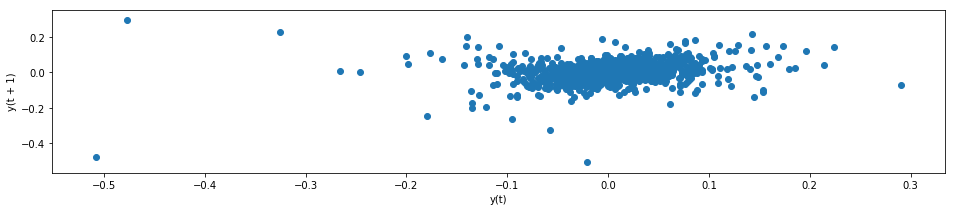

In [12]:

lag_plot(signal)
plt.show()

In [7]:
values = pd.DataFrame(signal.values)
dataframe = pd.concat([values.shift(1), values], axis=1)

In [8]:
dataframe.columns = ["t-1", "t+1"]
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.219356
t+1  0.219356  1.000000


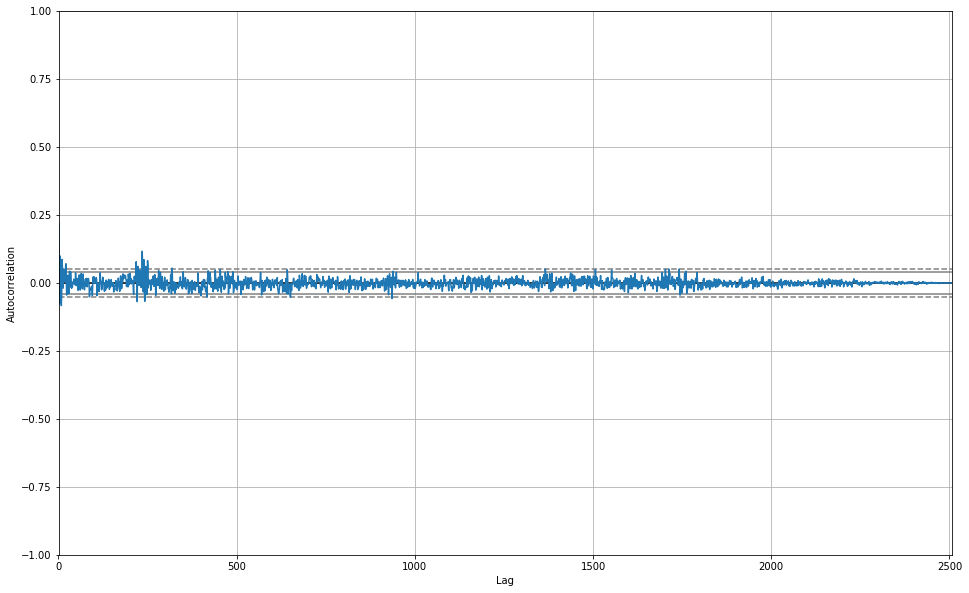

In [15]:
autocorrelation_plot(signal)
plt.show()

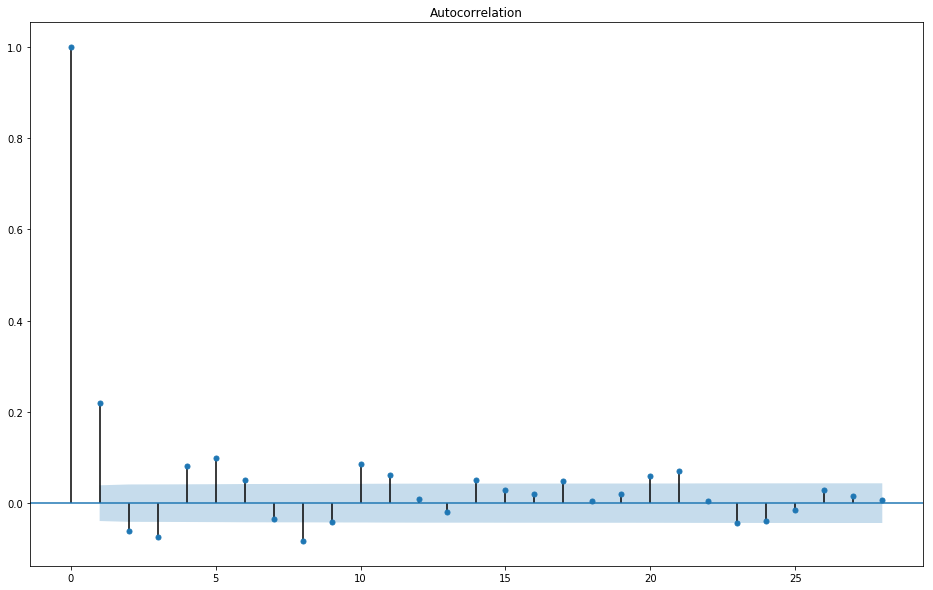

In [17]:
plot_acf(signal, lags=28)
plt.show()

Test MSE: 0.00013712


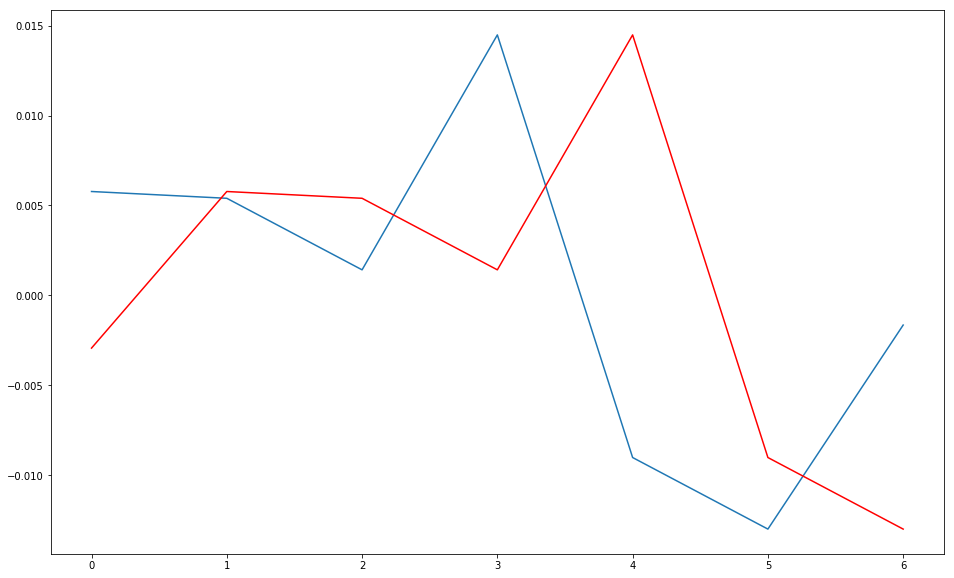

In [28]:
series=signal
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, np.array(predictions))
print('Test MSE: %.8f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

Lag: 27
Coefficients: [ 0.00186122  0.23933666 -0.09662655 -0.04877397  0.09856147  0.03121971
  0.02510675 -0.024717   -0.05035082 -0.04134873  0.07008271  0.01494796
  0.0213788  -0.0048386   0.06510271 -0.02423797 -0.00960894  0.05457316
 -0.01306276  0.0293277   0.04813166  0.03810363 -0.00695892 -0.01931508
 -0.02672808 -0.02508091  0.02422742  0.00119183]
predicted=0.003146, expected=0.005777
predicted=0.004859, expected=0.005399
predicted=0.003638, expected=0.001420
predicted=0.002738, expected=0.014487
predicted=-0.000345, expected=-0.009020
predicted=-0.000233, expected=-0.013001
predicted=0.002578, expected=-0.001652
Test MSE: 0.00005805


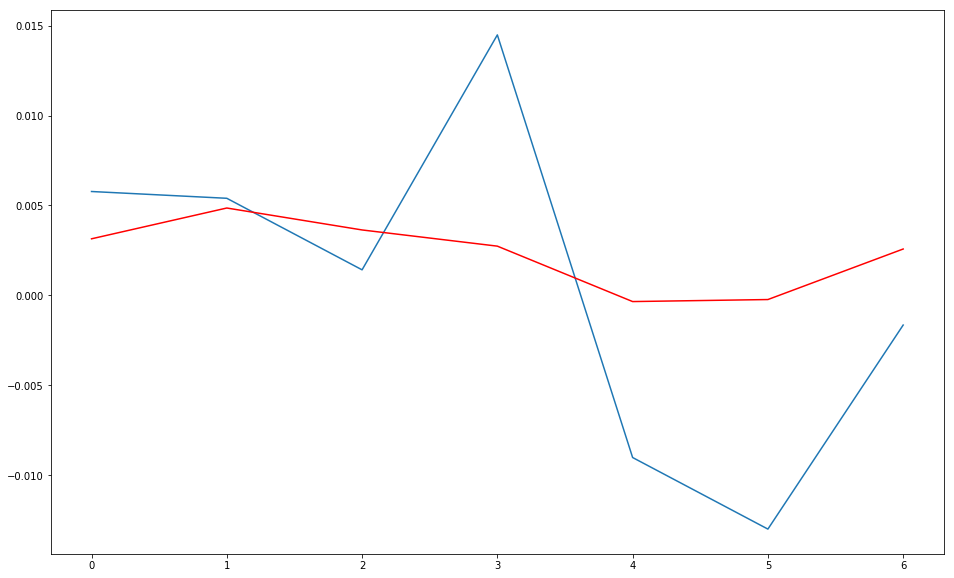

In [36]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.8f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=0.003146, expected=0.005777
predicted=0.005488, expected=0.005399
predicted=0.003514, expected=0.001420
predicted=0.002026, expected=0.014487
predicted=0.002914, expected=-0.009020
predicted=-0.003201, expected=-0.013001
predicted=-0.000348, expected=-0.001652
Test MSE: 0.00005811


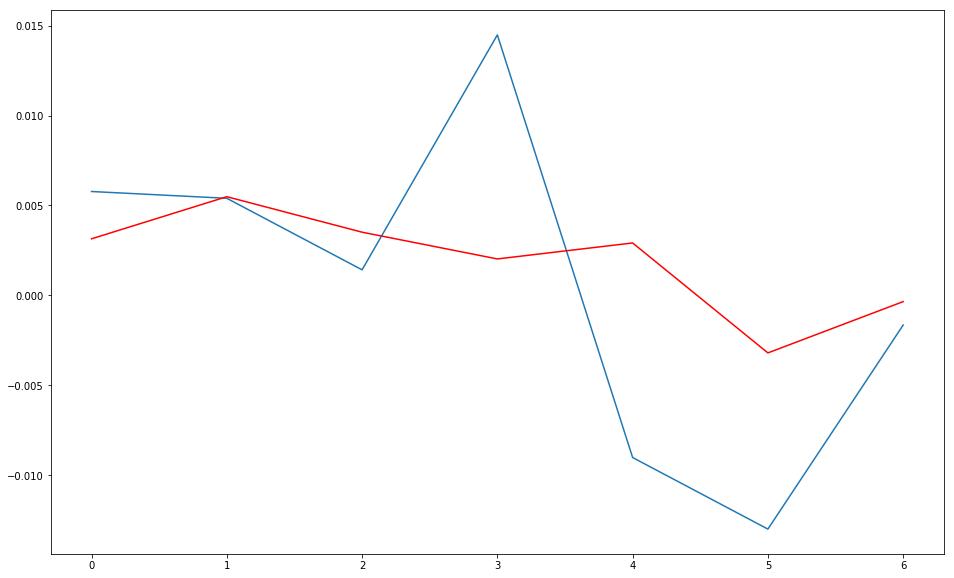

In [35]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.8f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Post tutorial

In [38]:
model = AR(signal.values)
model_fit = model.fit()

In [40]:
model_fit.fittedvalues

array([-0.02708295, -0.02543063,  0.04936516, ...,  0.00288664,
       -0.00328858, -0.00054693])

In [52]:
model_fit.predict()

array([-0.02708295, -0.02543063,  0.04936516, ...,  0.00288664,
       -0.00328858, -0.00054693])

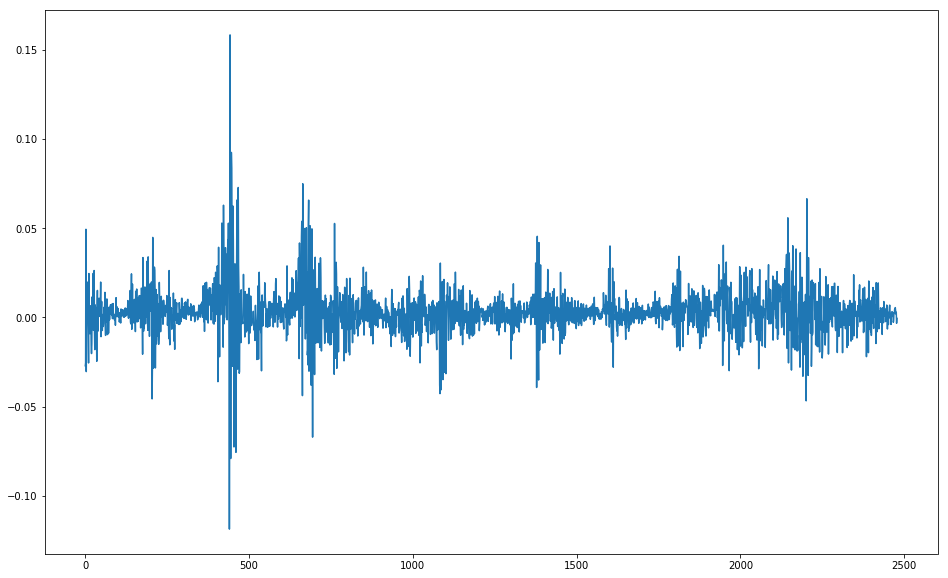

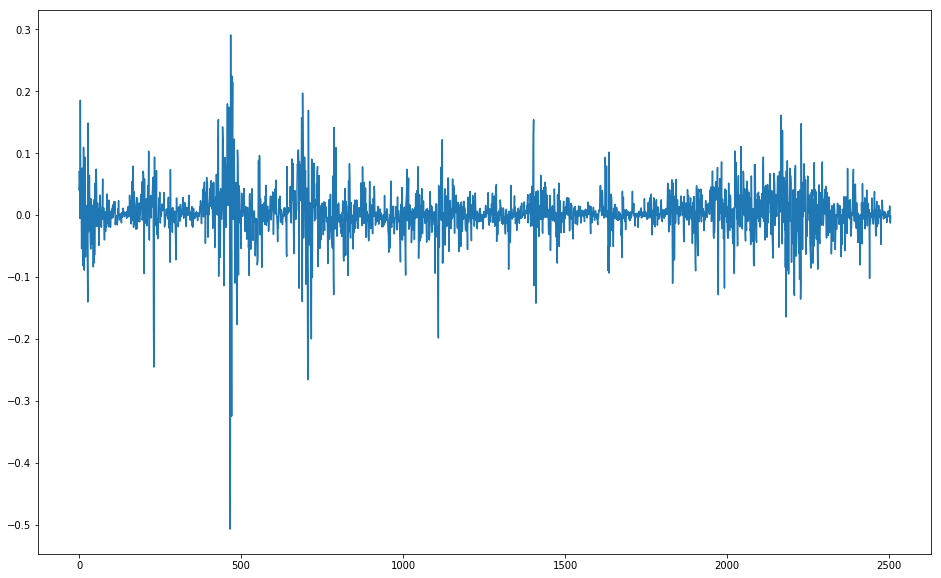

In [59]:
plt.plot(model_fit.predict())
plt.show()
plt.plot(signal.values)
plt.show()

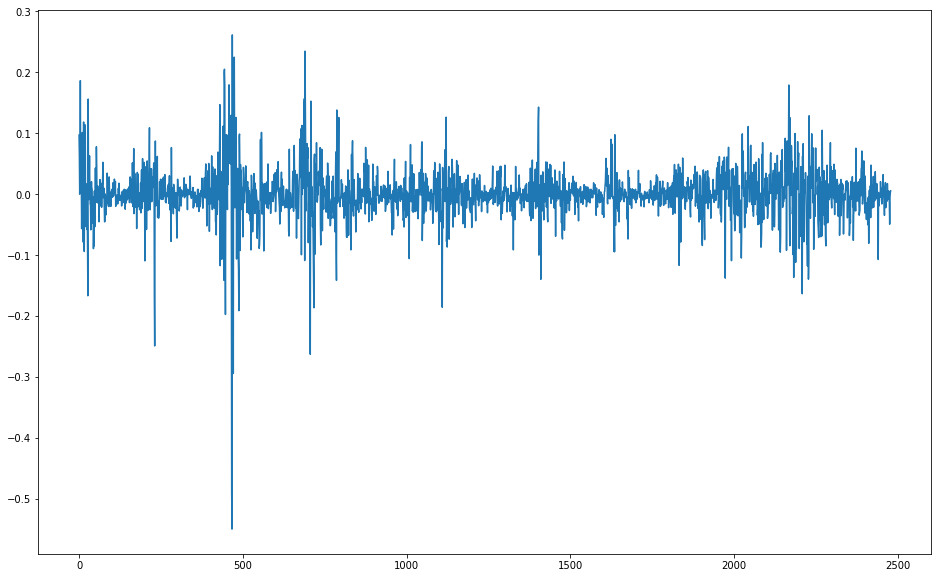

In [62]:
plt.plot((signal.values[:2479] - model_fit.predict()))

In [57]:
signal.shape

(2506,)

In [58]:
model_fit.predict().shape

(2479,)